In [162]:
import glob
import numpy as np
import pandas as pd

In [6]:
files = glob.glob('./data/*')

In [9]:
len(files) , files[0:5]

(5749,
 ['./data/Marlon_Devonish',
  './data/Dolly_Parton',
  './data/Rocco_Buttiglione',
  './data/Brandon_Lloyd',
  './data/Anastasia_Myskina'])

In [10]:
files_images = glob.glob('./data/*/*.jpg')    

In [12]:
len(files_images) , files_images[0:5] 

(13233,
 ['./data/Marlon_Devonish/Marlon_Devonish_0001.jpg',
  './data/Dolly_Parton/Dolly_Parton_0002.jpg',
  './data/Dolly_Parton/Dolly_Parton_0001.jpg',
  './data/Rocco_Buttiglione/Rocco_Buttiglione_0001.jpg',
  './data/Brandon_Lloyd/Brandon_Lloyd_0001.jpg'])

In [14]:
raw_X = []
raw_y = []
for my_image in files_images:
    split_arr = my_image.split('/')
    raw_y.append(split_arr[-2])
    raw_X.append(my_image)

In [17]:
raw_X[0:5] , raw_y[0:5] , len(raw_X) , len(raw_y)

(['./data/Marlon_Devonish/Marlon_Devonish_0001.jpg',
  './data/Dolly_Parton/Dolly_Parton_0002.jpg',
  './data/Dolly_Parton/Dolly_Parton_0001.jpg',
  './data/Rocco_Buttiglione/Rocco_Buttiglione_0001.jpg',
  './data/Brandon_Lloyd/Brandon_Lloyd_0001.jpg'],
 ['Marlon_Devonish',
  'Dolly_Parton',
  'Dolly_Parton',
  'Rocco_Buttiglione',
  'Brandon_Lloyd'],
 13233,
 13233)

In [31]:
df = pd.concat([pd.DataFrame(raw_X) , pd.DataFrame(raw_y)], axis=1) 
df.columns = ['Image','Label']

In [32]:
df.head()

,Image,Label
0,./data/Marlon_Devonish/Marlon_Devonish_0001.jpg,Marlon_Devonish
1,./data/Dolly_Parton/Dolly_Parton_0002.jpg,Dolly_Parton
2,./data/Dolly_Parton/Dolly_Parton_0001.jpg,Dolly_Parton
3,./data/Rocco_Buttiglione/Rocco_Buttiglione_000...,Rocco_Buttiglione
4,./data/Brandon_Lloyd/Brandon_Lloyd_0001.jpg,Brandon_Lloyd


In [117]:
df_count = df.groupby('Label').count()
df_count.columns = ['ImageCount']

In [119]:
df_count.sort_values('ImageCount' , ascending=False)

,ImageCount
Label,
George_W_Bush,530
Colin_Powell,236
Tony_Blair,144
Donald_Rumsfeld,121
Gerhard_Schroeder,109
Ariel_Sharon,77
Hugo_Chavez,71
Junichiro_Koizumi,60
Jean_Chretien,55


In [120]:
df_filter = df_count[ (df_count['ImageCount']) >= 50 ]

In [124]:
df_filter.index

Index(['Ariel_Sharon', 'Colin_Powell', 'Donald_Rumsfeld', 'George_W_Bush',
       'Gerhard_Schroeder', 'Hugo_Chavez', 'Jacques_Chirac', 'Jean_Chretien',
       'John_Ashcroft', 'Junichiro_Koizumi', 'Serena_Williams', 'Tony_Blair'],
      dtype='object', name='Label')

In [126]:
list_index = df_filter.index.tolist()

In [131]:
def filterCols(col):
    if col['Label'] in list_index:
        return True
    else:
        return False

In [133]:
df.columns

Index(['Image', 'Label'], dtype='object')

In [135]:
final_df = df.loc[df['Label'].isin(list_index)]

In [139]:
final_df.shape

(1560, 2)

In [145]:
final_df.head()

,Image,Label
489,./data/George_W_Bush/George_W_Bush_0394.jpg,George_W_Bush
490,./data/George_W_Bush/George_W_Bush_0377.jpg,George_W_Bush
491,./data/George_W_Bush/George_W_Bush_0204.jpg,George_W_Bush
492,./data/George_W_Bush/George_W_Bush_0203.jpg,George_W_Bush
493,./data/George_W_Bush/George_W_Bush_0416.jpg,George_W_Bush


In [161]:
import cv2 as cv2

In [154]:
X = []
y = []
for index, row in final_df.iterrows():
    #print(i)
    local_image =cv2.cvtColor( cv2.imread(row[0]) , cv2.COLOR_BGR2RGB)
    X.append( local_image)
    y.append(row[1])

In [155]:
X = np.array(X)
y = np.array(y)

In [158]:
import matplotlib.pyplot as plt

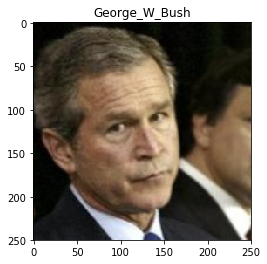

In [160]:
plt.title(y[0])
plt.imshow(X[0])


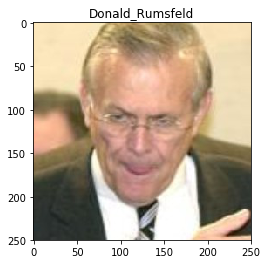

In [163]:
plt.title(y[789])
plt.imshow(X[789])


In [165]:
import seaborn as sns


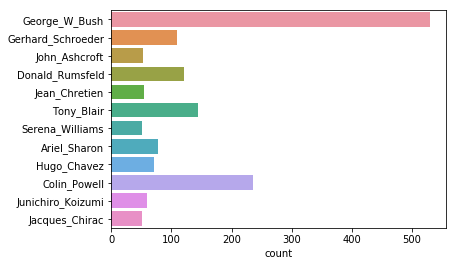

In [174]:
sns.countplot(y = y)

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_valid , y_train, y_valid = train_test_split(X, y, test_size = 0.1, shuffle=True)

In [176]:
import tensorflow as tf

In [177]:
EPOCHS = 50
BATCH_SIZE = 128

In [182]:
from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W= tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean=mu, stddev=sigma))
    conv1_b= tf.Variable(tf.zeros(6))
    conv1= tf.nn.conv2d(x,conv1_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True) + conv1_b

    # Activation.
    conv1= tf.nn.relu(conv1)

    # Layer 2: Convolutional. Input = 28x28x6. Output = 14x14x10.
    conv3_W= tf.Variable(tf.truncated_normal(shape=(5,5,6,10), mean=mu, stddev=sigma))
    conv3_b= tf.Variable(tf.zeros(10))
    conv3= tf.nn.conv2d(conv1,conv3_W,strides=[1,2,2,1],padding='VALID',use_cudnn_on_gpu=True) + conv3_b

    # Activation.
    conv3= tf.nn.relu(conv3)

    # Layer 3: Convolutional. Input = 14x14x10. Output = 8x8x16.
    conv2_W= tf.Variable(tf.truncated_normal(shape=(5,5,10,16),mean=mu,stddev=sigma))
    conv2_b=tf.Variable(tf.zeros(16))
    conv2= tf.nn.conv2d(conv3,conv2_W,strides=[1,1,1,1],padding='VALID',use_cudnn_on_gpu=True) + conv2_b
    
    # Activation.
    conv2= tf.nn.relu(conv2)

    # Pooling. Input = 8x8x16. Output = 4x4x16.
    conv2= tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

    # Flatten. Input = 4x4x16. Output = 256.
    f= flatten(conv2)

    # Layer 4: Fully Connected. Input = 256. Output = 120.
    fc1_W= tf.Variable(tf.truncated_normal(shape=(int(np.shape(f)[1]),120),mean=mu,stddev=sigma))
    fc1_b= tf.Variable(tf.zeros(shape=120))
    fc1= tf.matmul(f,fc1_W) + fc1_b
    
    # Activation.
    fc1= tf.nn.relu(fc1)
    
    # Introduce Dropout after first fully connected layer
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 5: Fully Connected. Input = 120. Output = 100.
    fc2_W= tf.Variable(tf.truncated_normal(shape=(120,100),mean=mu,stddev=sigma))
    fc2_b= tf.Variable(tf.zeros(100))
    fc2= tf.matmul(fc1,fc2_W) + fc2_b
    
    # Activation.
    fc2= tf.nn.relu(fc2)
    
    # Layer 6: Fully Connected. Input = 100. Output = 84.
    fc4_W= tf.Variable(tf.truncated_normal(shape=(100,84),mean=mu,stddev=sigma))
    fc4_b= tf.Variable(tf.zeros(84))
    fc4= tf.matmul(fc2,fc4_W) + fc4_b
    
    # Activation.
    fc4= tf.nn.relu(fc4)
    
    # Layer 7: Fully Connected. Input = 84. Output = 43.
    fc3_W= tf.Variable(tf.truncated_normal(shape=(84,12),mean=mu,stddev=sigma))
    fc3_b= tf.Variable(tf.zeros(12))
    fc3= tf.matmul(fc4,fc3_W) + fc3_b
    logits=fc3
        
    return logits

In [183]:
x = tf.placeholder(tf.float32, (None, 250, 250, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 12) # one hot encoding for output labels
keep_prob = tf.placeholder(tf.float32) # defining the dropout probability after fully connected layer in the architecture
print('Variables initialized successfully')

Variables initialized successfully


In [184]:
rate = 0.0009 #learning rate

#defining various operations
logits = LeNet(x) 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [185]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss=0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy,loss = sess.run([accuracy_operation,loss_operation],feed_dict={x: batch_x, y: batch_y,keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
        total_loss+= (loss*len(batch_x)) # getting the total loss to plot a graph later
    return total_accuracy / num_examples, total_loss/num_examples

In [186]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    loss_Acc=[]
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy,loss_acc = evaluate(X_valid, y_valid)
       
        print("EPOCH {} ...".format(i+1))
        loss_Acc.append(loss_acc)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    plt.plot(range(0,EPOCHS),loss_Acc)
    plt.ylabel('loss')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.show()
    saver.save(sess, './trafficTest')
    print("Model saved")

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version